In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def calc_out(X,w1,b1,w2,b2):
    z1 = np.matmul(w1,np.transpose(np.asmatrix(X))) + b1
    a1 = sigmoid(z1)
    z2 = np.matmul(w2, a1) + b2
    a2 = sigmoid(z2)
    a2[a2 >= 0.5] = 1.0
    a2[a2 < 0.5] = 0.0
    return a2

In [3]:
def error(yhat,y): 
    
    #returns number of misclassified examples. 
    #Used for calculating accuracy. 
    
    return abs(y-yhat)

def logloss(yhat,y):
    
    return -np.sum( np.multiply(y, np.log(yhat)) + np.multiply((1-y), np.log(1-yhat)) )

def sigmoid(x):
    
    sig = 1/(1+np.exp(-x))
    
    return sig

def sigmoid_gradient(z):
    sig_z = sigmoid(z)
    return np.multiply(sig_z, (1 - sig_z))

In [4]:
def forward(X,w1,w2,b1,b2):
    z1 = np.matmul(w1,np.transpose(np.asmatrix(X))) + b1
    a1 = sigmoid(z1)

    z2 = np.matmul(w2, a1) + b2
    a2 = sigmoid(z2)
    
    return z1, a1, z2, a2

In [6]:
def backprop(w1,b1,w2,b2,X_train,X_test):
    
    for i in range(epoch):
        
        no_of_batches = len(X_train) // N
        
        for j in range(no_of_batches):
            
            # Initilazing gradients
            
            delta1 = np.zeros(w1.shape)   #(5,5)
            delta2 = np.zeros(w2.shape)   #(1,5)
            db1 = 0.0
            db2 = 0.0
            
            
            for row in range(j*N,(j+1)*N):
                
                # Drop the date column and the index column
                X = X_train[row, 2:7]
                Y = X_train[row, 7]
                
                #feed forward
                z1  ,  a1  ,  z2  , a2 = forward(X,w1,w2,b1,b2)
                #(5,1) (5,1) (1,1) (1,1)
                
                #print(z1.shape, a1.shape, z2.shape, a2.shape)
                
                h = a2 # (1,1)
                   
                # initializations

                d3 = a2 - Y  #(1,1)
                
                delta2 += d3 * np.transpose(a2)  #(1,1)
                db2 += d3

                d2 = np.multiply((np.transpose(w2) * d3), sigmoid_gradient(z1),dtype=float)  #(5,1)
 
                delta1 += d2 * np.transpose(a1)  #(5,5)

                db1 += d2
                
                # add regularization term if needed
                #if regularize:
                #    delta1[:, 1:] = delta1[:, 1:] + (theta1[:, 1:] * learning_rate) / m
                #    delta2[:, 1:] = delta2[:, 1:] + (theta2[:, 1:] * learning_rate) / m
            
            
            # Gradient Descent Step
            #updating weights after every batch by averaging the gradients
            w1 = w1 - lr * 1.0/N * delta1 #taking the average of gradients
            b1 = b1 - lr * 1.0/N * db1
            w2 = w2 - lr * 1.0/N * delta1
            b2 = b2 - lr * 1.0/N * db2
            
            
            
        print("************************************************")
        print("Train error after epoch {} is: ".format(i), np.sum(error(calc_out(X_train[:,2:7],w1,b1,w2,b2),X_train[:,7])) / len(X_train) * 100)    
        print("Test error after epoch {} is: ".format(i), np.sum(error(calc_out(X_test[:,2:7],w1,b1,w2,b2),X_test[:,7])) / len(X_test) * 100)
        print("************************************************")
        print()
    
        train_error[i] = np.sum(error(calc_out(X_train[:,2:7],w1,b1,w2,b2),X_train[:,7])) / len(X_train) * 100
        test_error[i] = np.sum(error(calc_out(X_test[:,2:7],w1,b1,w2,b2),X_test[:,7])) / len(X_test) * 100
        
    return [w1,b1,w2,b2]


In [8]:
def initial():
    
    #load Occupancy data in the form of ndarray
    print ("Loading the Occupancy data......")
    X_train = np.genfromtxt('train_data.txt',delimiter=",", skip_header = 1)
    X_test = np.genfromtxt('test_data.txt',delimiter=",", skip_header = 1)

    #Doing input normalization for training set
    
    print ("Normalizing Occupancy data......")
    for i in range(2,7):
         
        m = np.mean(X_train[:,i])
        sd = np.std(X_train[:,i])
        for j in range(len(X_train)):
            X_train[j,i] = (X_train[j,i] - m) / sd
        

    #Doing input normalization for test set
    #Doing normalization of columns 2 to column 7 ignoring index and date columns
    
    for i in range(2,7):
        m = np.mean(X_test[:,i])
        sd = np.std(X_test[:,i])
        for j in range(len(X_test)):
            X_test[j,i] = (X_test[j,i] - m) / sd
            
    print("************************************************")
    print("The shape of training data before removing index, date, label columns is", X_train.shape)
    print("The shape of test data before removing index, date, label columns is", X_test.shape)
    print("************************************************")
    
    # Columns are "Humidity","Light","CO2","HumidityRatio","Occupancy"

    #initializing weights and bias
    
    print ("Initializing weights and bias for the network")
    
    weight_dim = [5,H,1] 
    #[number of input features, number of hidden units, number of output units]
    
    print("Initializing using He initialization")
    
    w1 = np.random.randn(weight_dim[1],weight_dim[0]) * np.sqrt(2/weight_dim[0]) # 0.01
    b1 = np.zeros((weight_dim[1],1))
    w2 = np.random.randn(weight_dim[2],weight_dim[1]) * np.sqrt(2/weight_dim[1]) # 0.01
    b2 = np.zeros((weight_dim[2],1))

    #training the neuron architecture
    print ("Training the neuron network...........")
    [w1,b1,w2,b2] = backprop(w1,b1,w2,b2,X_train,X_test)

    #maximum accuracy achieved
    print()
    print ("Accuracy on training set: " + str(100 - min(train_error)))
    print ("Accuracy on test set: " + str(100 - min(test_error)))
    

    #Train and test error
    print()
    print ("Error on training set: " + str(min(train_error)))
    print ("Error on test set: " + str(min(test_error)))
    print()
    
    #Ploting the results
    plt.title("Performance on training (green) and test (red) set")
    plt.xlabel('Number of Epochs')
    plt.ylabel('Performance (% examples classified correctly)')
    plt.plot(100-train_error,'g')
    plt.plot(100-test_error,'r')
    #plt.savefig("1a_8143e_batch_Epoc_Vs_Accu.png")
    plt.show()
    
    
    #Ploting the results
    plt.title("Error on training (green) and test (red) set")
    plt.xlabel('Number of Epochs')
    plt.ylabel('Error (% examples misclassification')
    plt.plot(train_error,'g')
    plt.plot(test_error,'r')
    plt.savefig("1a_8143e_batch_Epoc_Vs_Error.png")
    plt.show()

Loading the Occupancy data......
Normalizing Occupancy data......
************************************************
The shape of training data before removing index, date, label columns is (8143, 8)
The shape of test data before removing index, date, label columns is (9752, 8)
************************************************
Initializing weights and bias for the network
Initializing using He initialization
Training the neuron network...........
************************************************
Train error after epoch 0 is:  106.16480412624341
Test error after epoch 0 is:  105.05537325676784
************************************************

************************************************
Train error after epoch 1 is:  97.26145155348152
Test error after epoch 1 is:  102.33798195242001
************************************************

************************************************
Train error after epoch 2 is:  84.63711162962053
Test error after epoch 2 is:  93.34495488105004
***********

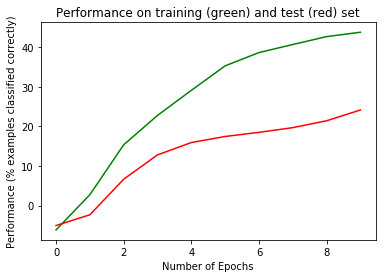

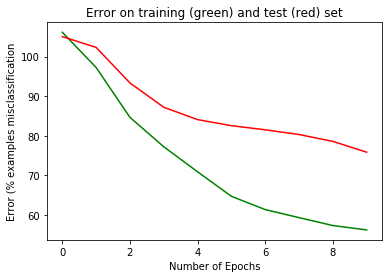

In [9]:
if __name__ == '__main__':
    
    #number of hidden units
    H = 5 
    #size of mini batch to be equal to training data points
    N = 100 #8143 for size of train data
    #number of Epochs
    epoch = 10
    #learning rate
    lr = 0.1  #0.1 
    
    train_error = np.zeros(epoch,dtype=np.float)
    test_error = np.zeros(epoch,dtype = np.float)
    
    initial()